In [1]:
from helper_pca import load_images, get_pca_input
import os
import numpy as np
from skimage.io import imshow, imread
import matplotlib.pyplot as plt

In [2]:
def load_images(main_folder_path):
    images_per_folder, test_images_per_folder = {}, {}
    folder_names = os.listdir(main_folder_path)
    for folder_name in folder_names:
        folder_path = os.path.join(main_folder_path, folder_name)
        image_names = os.listdir(folder_path)
        # Load and store "train" images
        images_per_image_name = {}
        for image_name in image_names:
            image_path = os.path.join(folder_path, image_name)
            image = imread(image_path)
            if image_name.split('.')[-1] == 'png': image = np.delete(image, 3, axis=2)
            images_per_image_name[image_name] = image
        images_per_folder[folder_name] = images_per_image_name
        # Load and store "test" images
        test_images_per_image_name = {}
        for image_name in image_names[-1:]:
            image_path = os.path.join(folder_path, image_name)
            image = imread(image_path)
            test_images_per_image_name[image_name] = image
        test_images_per_folder[folder_name] = test_images_per_image_name
    return images_per_folder, test_images_per_folder

def get_pca_input(images):
    pca_per_class = {}
    img_data_per_class = {}
    for image_class, image_name_pairs  in images.items():
        # Get image data array from class
        images_data = []
        for _, image in image_name_pairs.items():
            images_data.append(np.reshape(image, newshape=-1))
        images_data = np.array(images_data)
        # print(image_class, '-', images_data.shape)
        # Apply PCA and store results
        # pca = PCA() # THIS WILL FAIL IF NO. OF SAMPLES IS < 5 (for sklearn's PCA)
        '''
        new_images_data = pca.fit_transform(images_data)
        pca_per_class[image_class] = {
            'pca_object' : pca,
            'projections' : new_images_data
        }
        '''
        img_data_per_class[image_class] = images_data
    return pca_per_class, img_data_per_class

In [13]:
images, _ = load_images(os.path.join('.', 'test_imgs'))
_, images_matrices = get_pca_input(images)
X = images_matrices['zebra']
print('Matrix of flattened images', X.shape)
# TRAIN PCA
# Center data using mean of every feature
print(np.mean(np.mean(X)))
mean = np.mean(X.T, axis=1)
print(np.max(mean), np.min(mean))
print('Averages:', mean.shape)
C = X - mean
print(np.max(C))
# Doc's little trick
L = C @ C.T
print('Cov. matrix equivalent', L.shape)
# Warning: T may have the same shape, but use the transpose
vals, vecs = np.linalg.eig(L)
print('Eigenvectors', vecs.shape)
# Sort eigenstuff
sorted_vals_idxs = np.argsort(vals)[::-1]
sorted_vals = np.sort(vals)[::-1] # -1 for descending order
sorted_vecs = vecs[sorted_vals_idxs]
print(sorted_vals[0])
# Construct
u = np.zeros(X.shape)
for i, eig in enumerate(sorted_vecs):
    u[i] = C.T @ eig
    u[i] = u[i] / np.linalg.norm(u[i])
print('Unnamed matrix', u.shape)
print('1st Component', u[0][0])

Matrix of flattened images (78, 150528)
121.00197186246294
160.1153846153846 73.71794871794872
Averages: (150528,)
177.15384615384616
Cov. matrix equivalent (78, 78)
Eigenvectors (78, 78)
6852411632.578266
Unnamed matrix (78, 150528)
1st Component -0.00167462950474319


In [14]:
def plot_prt(i):
    n = i - 1 if i >= 1 else i if i < 0 else 0
    prototype = np.reshape(u[n], (224, 224, 3))
    abs_min_val, abs_max_val = np.abs(np.min(prototype)), np.abs(np.max(prototype))
    max_val = abs_min_val if abs_min_val > abs_max_val else abs_max_val
    prototype = np.abs(prototype / max_val)
    imshow(prototype)

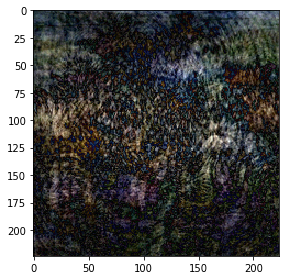

In [15]:
plot_prt(1)

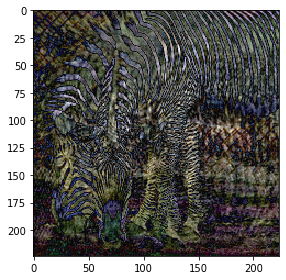

In [16]:
plot_prt(2)

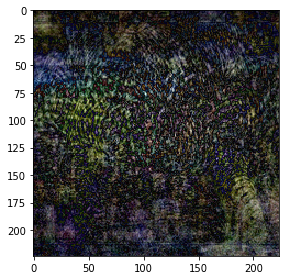

In [17]:
plot_prt(-1)